In [201]:
from fastai.tabular.all import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
data_path = 'C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/'

# Data Collection

In [202]:
headings = ['Cultivars','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids', 
                       'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
                       'OD280/OD315 of diluted wines','Proline']

In [203]:
df = pd.read_csv(data_path + 'wine.csv', header=None,
                names=headings)

In [204]:
df.head()

,Cultivars,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,...,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,...,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,...,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,...,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,...,4.32,1.04,2.93,735


# Train model on data first time

In [205]:
cont = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids', 
                       'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
                       'OD280/OD315 of diluted wines','Proline']
targ = 'Cultivars'

In [206]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [207]:
to = TabularPandas(df, procs=[Categorify,Normalize],
                  cont_names = cont,
                  y_names = targ,
                  y_block = CategoryBlock,
                  splits=splits)

In [208]:
dls = to.dataloaders(bs=64, num_workers=0)

In [209]:
dls.show_batch()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivars
0,12.42,1.61,2.19,22.500000,108.000000,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.000015,2
1,13.63,1.81,2.70,17.200001,112.000000,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.000001,1
2,12.08,1.33,2.30,23.600000,70.000001,2.20,1.59,0.42,1.38,1.74,1.07,3.21,624.999996,2
3,14.06,1.63,2.28,16.000000,126.000000,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.000001,1
4,13.88,1.89,2.59,15.000000,101.000000,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.000005,1
5,14.37,1.95,2.50,16.799999,113.000000,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1479.999980,1
6,13.24,3.98,2.29,17.500000,103.000000,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.000001,1
7,13.62,4.95,2.35,20.000000,92.000000,2.00,0.80,0.47,1.02,4.40,0.91,2.05,549.999995,3
8,13.49,1.66,2.24,24.000000,87.000000,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.000009,2
9,13.88,5.04,2.23,20.000000,80.000000,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.000017,3


In [210]:
learn = tabular_learner(dls, metrics=accuracy)

In [211]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.990724,1.045510,0.428571,00:00
1,0.953630,1.017685,0.600000,00:00
2,0.897625,0.954928,0.857143,00:00
3,0.803675,0.855023,0.885714,00:00
4,0.708693,0.731064,0.885714,00:00
5,0.622360,0.606593,0.914286,00:00
6,0.548976,0.501362,0.914286,00:00
7,0.487903,0.416475,0.914286,00:00
8,0.438480,0.352866,0.914286,00:00
9,0.397216,0.307209,0.914286,00:00


# Data Preparation

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivars                     178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [213]:
df.describe()

,Cultivars,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,...,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,...,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,...,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,...,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,...,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,...,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,...,13.000000,1.710000,4.000000,1680.000000


In [214]:
df.corr()

,Cultivars,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Cultivars,1.000000,-0.328222,0.437776,-0.049643,...,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,...,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,...,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,...,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,...,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,...,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,...,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,...,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,...,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,...,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:xlabel='Cultivars', ylabel='count'>

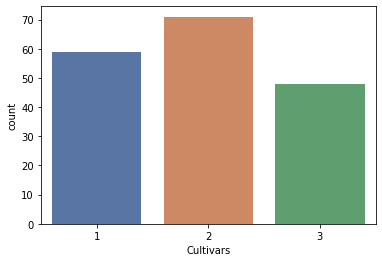

In [215]:
sns.countplot(x=df['Cultivars'], palette=sns.color_palette("deep"))

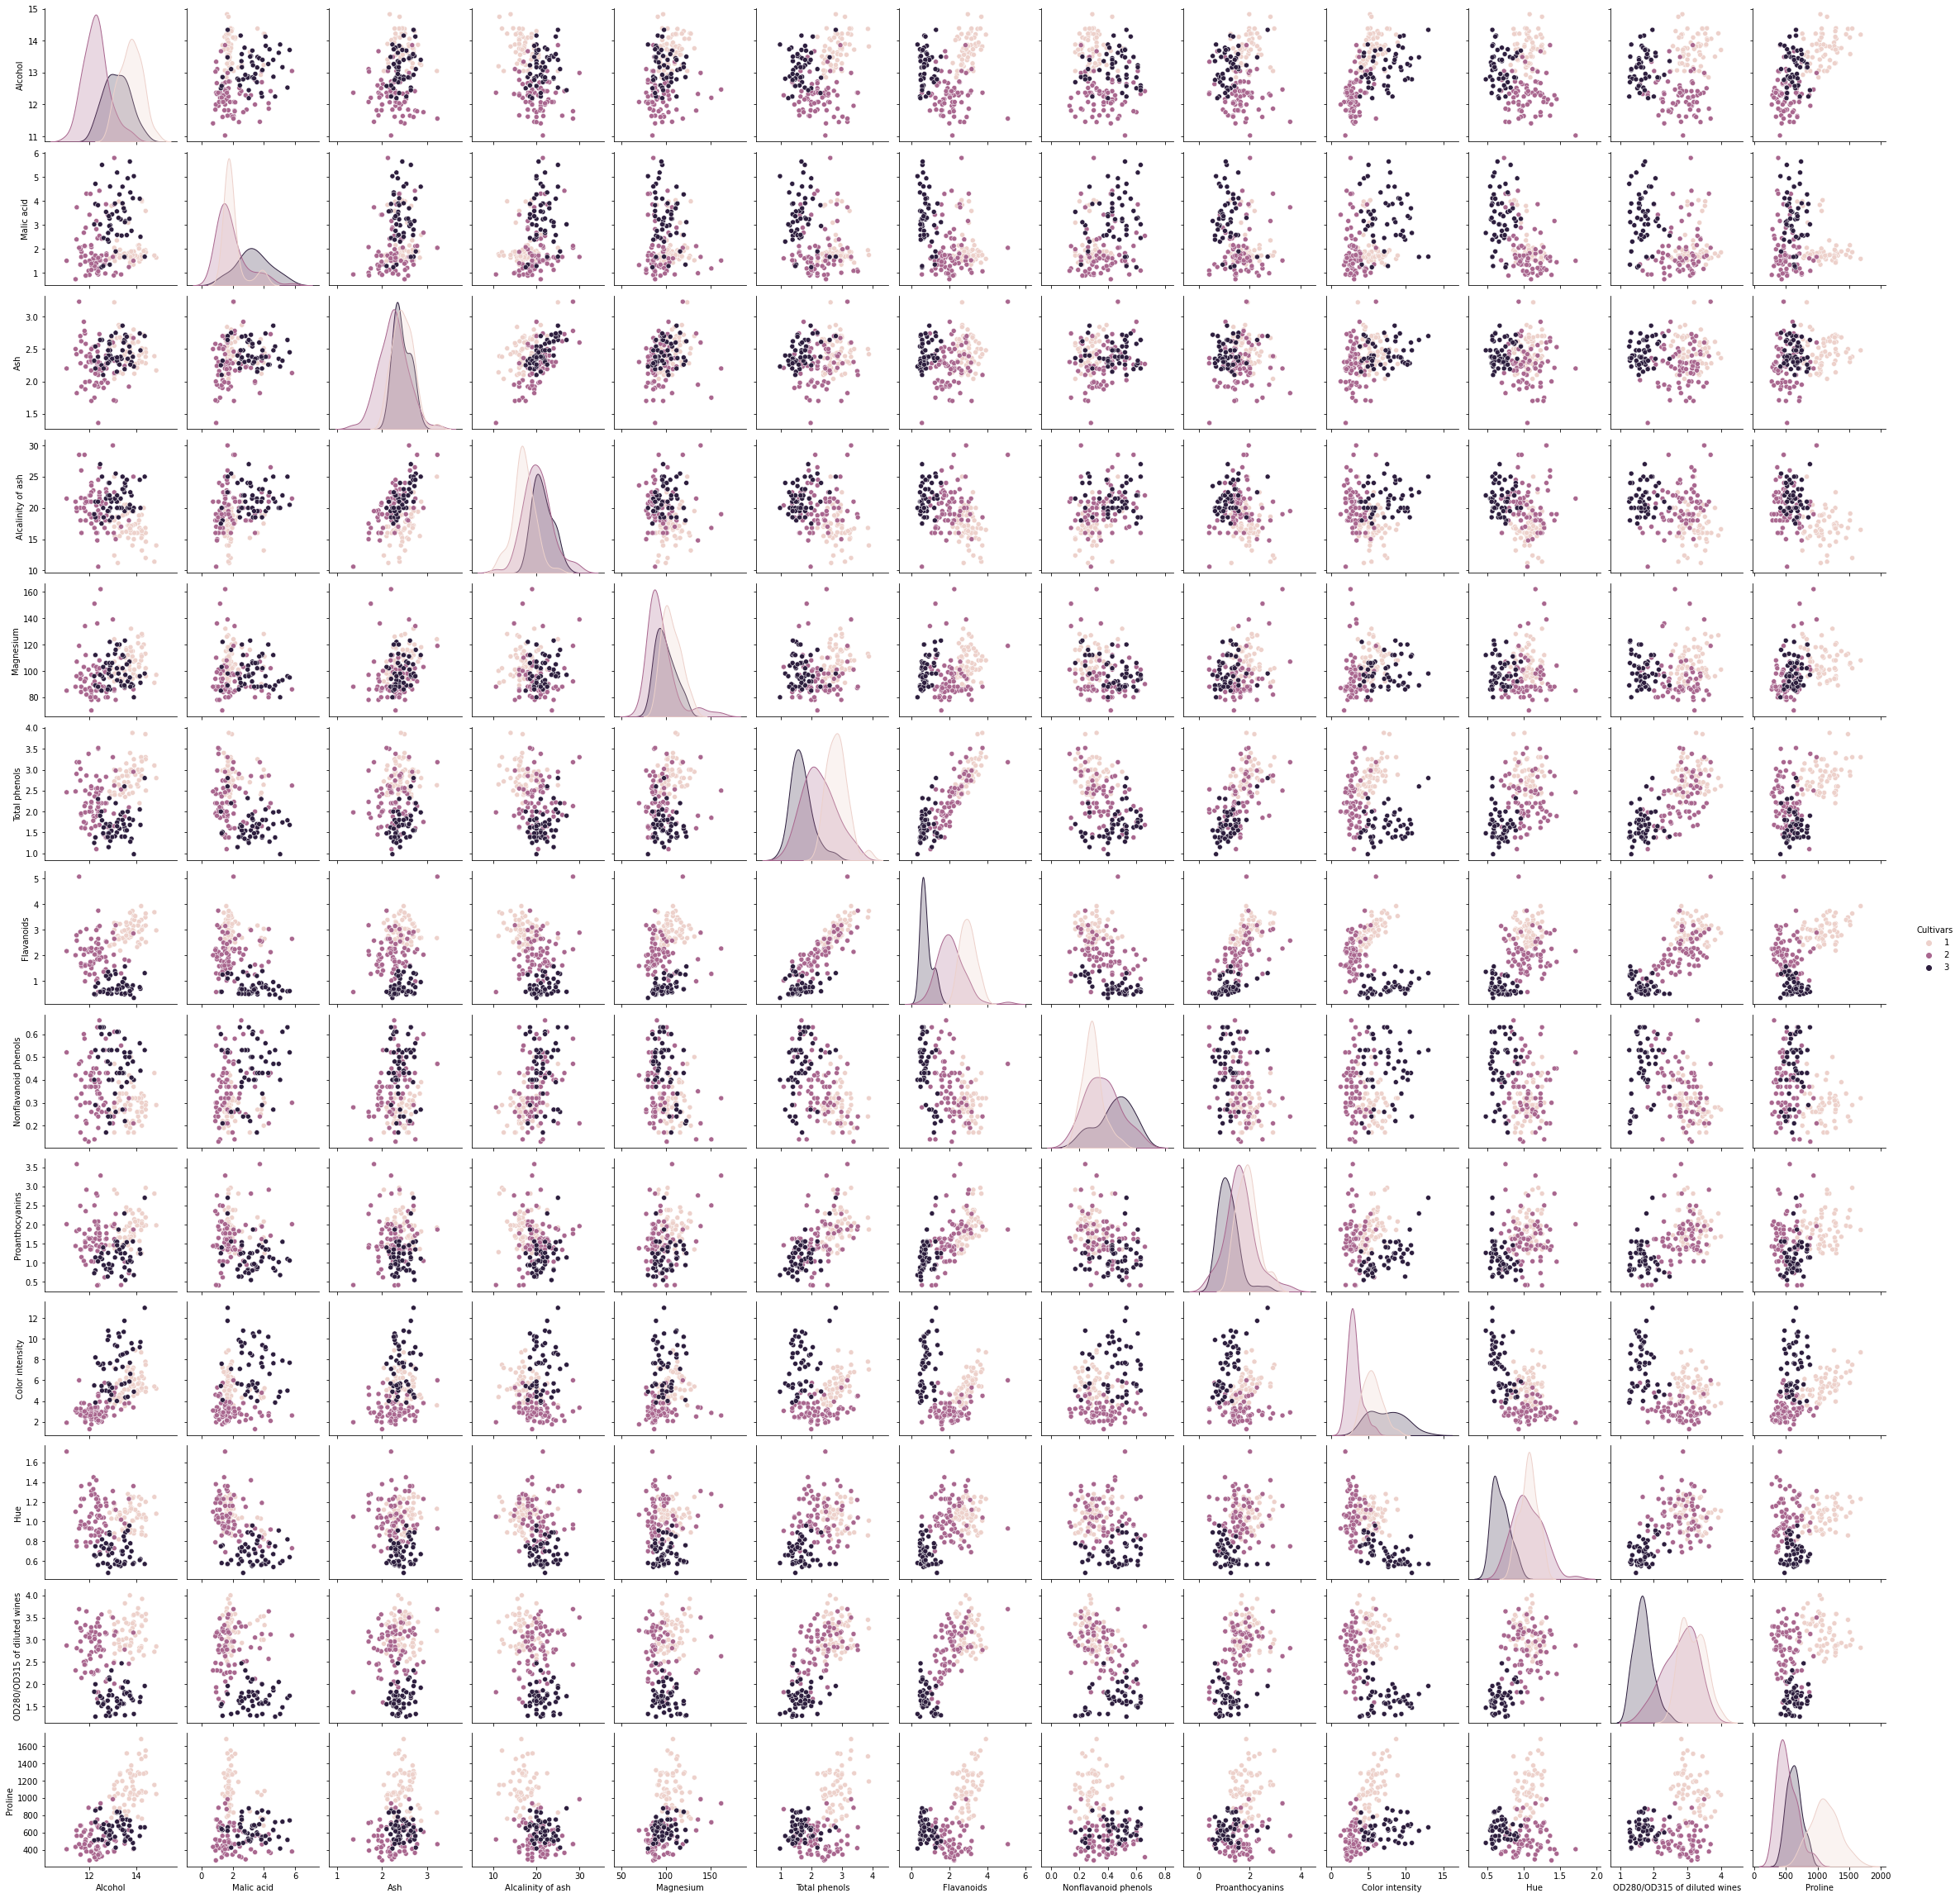

In [216]:
sns.pairplot(df, hue='Cultivars')

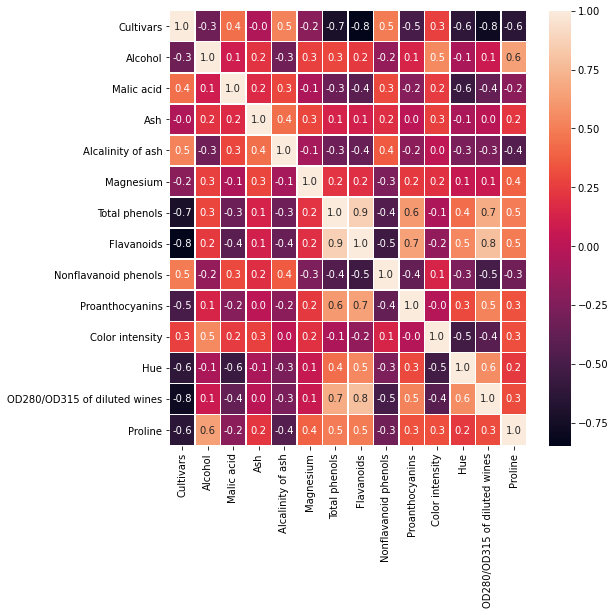

In [217]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [218]:
strong_corr = df.corr().abs().sum()
strong_corr

Cultivars                       7.402563
Alcohol                         4.367915
Malic acid                      4.670193
Ash                             3.156218
Alcalinity of ash               4.885079
Magnesium                       3.522095
Total phenols                   6.621719
Flavanoids                      7.209950
Nonflavanoid phenols            5.312493
Proanthocyanins                 5.101221
Color intensity                 4.197137
Hue                             5.513241
OD280/OD315 of diluted wines    6.392491
Proline                         6.026176
dtype: float64

In [219]:
weak_corr = strong_corr.nsmallest(3)
weak_corr

Ash                3.156218
Magnesium          3.522095
Color intensity    4.197137
dtype: float64

In [220]:
df2 = df.drop(columns=['Ash','Magnesium','Color intensity'])
df2.head()

,Cultivars,Alcohol,Malic acid,Alcalinity of ash,...,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,15.6,...,2.29,1.04,3.92,1065
1,1,13.20,1.78,11.2,...,1.28,1.05,3.40,1050
2,1,13.16,2.36,18.6,...,2.81,1.03,3.17,1185
3,1,14.37,1.95,16.8,...,2.18,0.86,3.45,1480
4,1,13.24,2.59,21.0,...,1.82,1.04,2.93,735


In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivars                     178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Total phenols                 178 non-null    float64
 5   Flavanoids                    178 non-null    float64
 6   Nonflavanoid phenols          178 non-null    float64
 7   Proanthocyanins               178 non-null    float64
 8   Hue                           178 non-null    float64
 9   OD280/OD315 of diluted wines  178 non-null    float64
 10  Proline                       178 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 15.4 KB


# Train model on data second time

In [222]:
cont2 = ['Alcohol','Malic acid','Alcalinity of ash','Total phenols','Flavanoids', 
                       'Nonflavanoid phenols','Proanthocyanins','Hue',
                       'OD280/OD315 of diluted wines','Proline']
targ2 = 'Cultivars'

In [223]:
splits2 = RandomSplitter(valid_pct=0.2)(range_of(df2))

In [224]:
to2 = TabularPandas(df2, procs=[Categorify,Normalize],
                  cont_names = cont2,
                  y_names = targ2,
                  y_block = CategoryBlock,
                  splits=splits2)

In [225]:
dls2 = to2.dataloaders(bs=64,num_workers=0)

In [226]:
dls2.show_batch()

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline,Cultivars
0,12.04,4.30,22.000000,2.10,1.75,0.42,1.35,0.79,2.57,580.000000,2
1,11.62,1.99,18.000000,3.02,2.26,0.17,1.35,1.16,2.96,344.999988,2
2,12.51,1.73,20.500000,2.20,1.92,0.32,1.48,1.04,3.57,672.000000,2
3,12.16,1.61,22.799999,1.78,1.69,0.43,1.56,1.33,2.26,494.999995,2
4,11.82,1.47,20.799999,1.98,1.60,0.30,1.53,0.95,3.33,494.999995,2
5,12.00,0.92,19.000000,2.42,2.26,0.30,1.43,1.38,3.12,278.000008,2
6,12.69,1.53,20.700001,1.38,1.46,0.58,1.62,0.96,2.06,494.999995,2
7,13.48,1.67,22.500000,2.60,1.10,0.52,2.29,0.57,1.78,620.000004,3
8,13.88,5.04,20.000000,0.98,0.34,0.40,0.68,0.58,1.33,415.000004,3
9,12.84,2.96,24.000000,2.32,0.60,0.53,0.81,0.89,2.15,590.000001,3


In [227]:
learn2 = tabular_learner(dls2, metrics=accuracy)

In [228]:
learn2.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,1.141631,1.047904,0.485714,00:00
1,1.087216,1.014469,0.571429,00:00
2,1.021780,0.942292,0.771429,00:00
3,0.928791,0.829816,0.942857,00:00
4,0.818594,0.696474,0.971429,00:00
5,0.723576,0.567234,1.000000,00:00
6,0.642401,0.463310,1.000000,00:00
7,0.575052,0.377146,1.000000,00:00
8,0.518910,0.313517,1.000000,00:00
9,0.474025,0.264084,1.000000,00:00


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=7.585775847473997e-07)

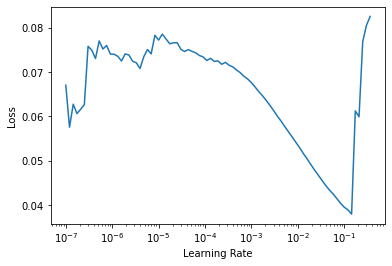

In [229]:
learn2.lr_find()

In [230]:
learn2.summary()

TabularModel (Input shape: 64 x torch.Size([64, 10]))
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 10             
BatchNorm1d                               20         True      
____________________________________________________________________________
                     64 x 200            
Linear                                    2000       True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     64 x 100            
Linear                                    20000      True      
ReLU                                                           
BatchNorm1d                               200        True      
____________________________________________________________________________
                     64 x 3              
Linear                             

# Analysis/Evaluation

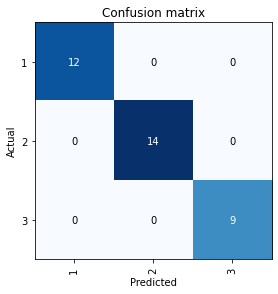

In [231]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

In [232]:
interp.print_classification_report()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [233]:
learn2.show_results()

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline,Cultivars,Cultivars_pred
0,1.712296,1.066686,-1.153253,1.595877,1.173405,-0.744345,1.094462,0.402433,1.160693,1.127102,0.0,0.0
1,0.930547,-0.624539,-1.023551,0.524930,0.898462,-1.220948,0.042214,-0.133978,0.822679,1.110224,0.0,0.0
2,0.270947,-0.527645,-2.709667,0.607311,0.755898,-0.823779,-0.585443,0.447134,1.104357,1.076467,0.0,0.0
3,-0.119927,0.538178,0.143759,-1.616963,-0.812297,-0.982647,-1.416165,-0.938594,-1.684260,-0.678891,2.0,2.0
4,0.417524,0.758390,0.630139,-0.578969,-1.280718,0.685464,-0.640824,-1.787912,-1.402581,-0.273808,2.0,2.0
5,0.661822,0.696731,1.278645,-1.205060,-1.525112,1.082633,-1.933059,-0.268081,-0.782889,-0.712648,2.0,2.0
6,-0.571875,-1.003302,-0.666873,-0.463636,-1.464014,1.876972,-0.640824,-0.893894,-1.557504,-0.273808,2.0,2.0
7,1.700080,-0.377902,-0.893850,2.584443,1.499264,-0.982647,1.076002,-0.402183,1.174777,2.528013,0.0,0.0
8,0.625176,-0.633347,1.440771,-0.661349,-0.180945,-0.744345,-1.046955,0.134228,0.231154,-0.874681,1.0,1.0


# Serve model

In [234]:
learn2.export()
path = Path()
path.ls(file_exts='.pkl')

(#4) [Path('export.pkl'),Path('to.pkl'),Path('valid_xs_final.pkl'),Path('xs_final.pkl')]

In [235]:
learn_inf2 = load_learner(path/'export.pkl')

In [236]:
row, clas, probs = learn2.predict(df2.iloc[1])
row.show()

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline,Cultivars
0,13.2,1.78,11.2,2.65,2.76,0.26,1.28,1.05,3.4,1049.999988,1


In [237]:
test_df2 = df2.copy()
test_df2.drop(['Cultivars'], axis=1, inplace=True)
dl2 = learn_inf2.dls.test_dl(test_df2)

In [238]:
learn_inf2.get_preds(dl=dl2)

(tensor([[9.9466e-01, 2.5944e-03, 2.7478e-03],
         [9.5412e-01, 3.9468e-02, 6.4153e-03],
         [9.7769e-01, 1.1850e-02, 1.0455e-02],
         [9.9872e-01, 1.9780e-04, 1.0864e-03],
         [8.9594e-01, 7.4115e-02, 2.9947e-02],
         [9.9773e-01, 2.9308e-04, 1.9780e-03],
         [9.9582e-01, 1.0312e-03, 3.1498e-03],
         [9.9526e-01, 2.5317e-03, 2.2114e-03],
         [9.8635e-01, 2.2693e-03, 1.1377e-02],
         [9.8774e-01, 7.2450e-03, 5.0155e-03],
         [9.9795e-01, 5.5906e-04, 1.4876e-03],
         [9.7772e-01, 4.9386e-03, 1.7339e-02],
         [9.9126e-01, 2.9068e-03, 5.8334e-03],
         [9.9414e-01, 8.9945e-04, 4.9622e-03],
         [9.9871e-01, 2.0317e-04, 1.0915e-03],
         [9.8950e-01, 5.8903e-03, 4.6083e-03],
         [9.8787e-01, 1.3827e-03, 1.0751e-02],
         [9.8455e-01, 4.8220e-03, 1.0625e-02],
         [9.9939e-01, 8.5086e-05, 5.2561e-04],
         [9.6605e-01, 2.5101e-02, 8.8527e-03],
         [9.5620e-01, 2.9943e-02, 1.3854e-02],
         [6.1

# Retrain model

In [239]:
import fastbook
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [240]:
df3 = df.copy()

In [241]:
df3.head()

,Cultivars,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,...,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,...,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,...,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,...,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,...,4.32,1.04,2.93,735


In [242]:
dep_var3 = 'Cultivars'

In [243]:
procs3 = [Categorify,Normalize]

In [244]:
splits3 = RandomSplitter(valid_pct=0.2)(range_of(df3))

In [245]:
cont3,cat3 = cont_cat_split(df3, 1, dep_var=dep_var3)

In [246]:
to3 = TabularPandas(df3, procs3, cat3, cont3, y_names=dep_var3, y_block = CategoryBlock, splits=splits3)

In [247]:
len(to3.train), len(to3.valid)

(143, 35)

In [248]:
to3.show(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivars
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,3
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,3
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0,2


In [249]:
xs3, y3 = to3.train.xs, to3.train.y
valid_xs3, valid_y3 = to3.valid.xs, to3.valid.y

In [250]:
m3 = DecisionTreeClassifier()
m3.fit(xs3,y3);

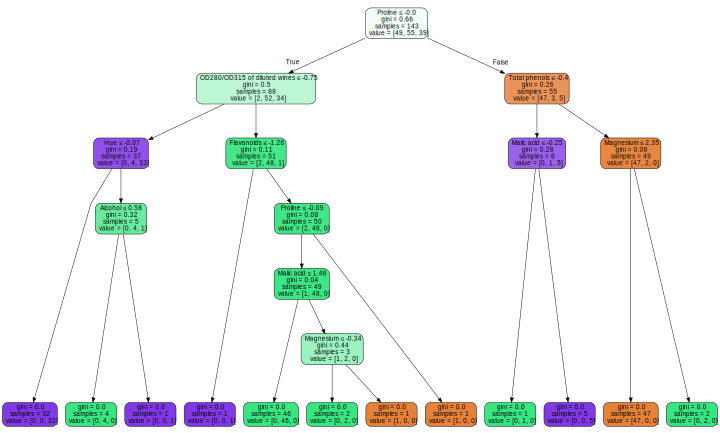

In [251]:
draw_tree(m3, xs3, size=10, leaves_parallel=True, precision=2)

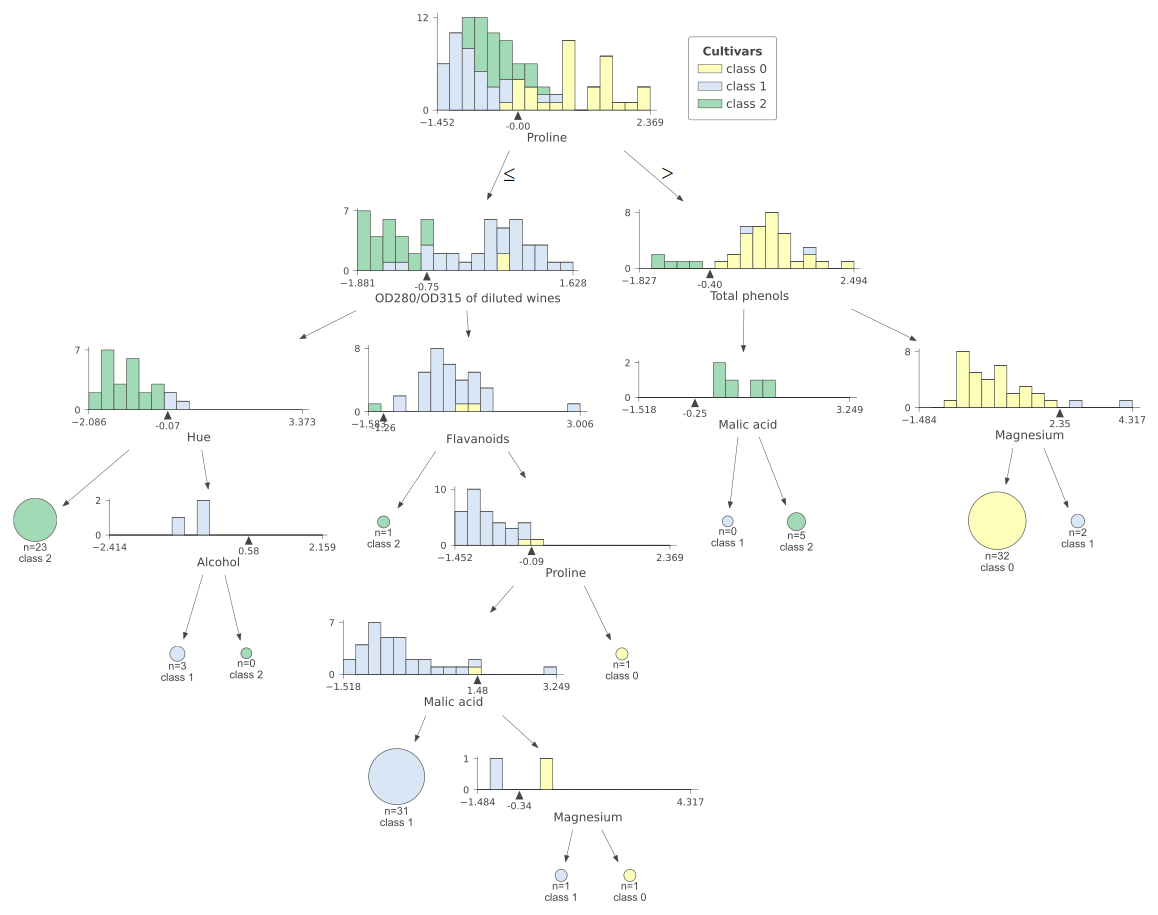

In [252]:
samp_idx3 = np.random.permutation(len(y3))[:100]
dtreeviz(m3, xs3.iloc[samp_idx3], y3.iloc[samp_idx3], xs3.columns, dep_var3,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10)

In [253]:
import math

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

def accuracy(inp, targ, axis=-1):
    pred = np.argmax(inp, axis)
    return (pred == targ).mean()
    
    #sig = np.vectorize(sigmoid)
    #preds = sig(inp)
    #correct = (preds>0.5) == targ
    #return correct.mean()

def m_accuracy(m, xs, y):
    return accuracy(m.predict(xs), y)

In [254]:
m_accuracy(m3, xs3, y3)

0.34265734265734266

In [255]:
def rf(xs, y, n_estimators=40, max_samples=143, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features,
                                 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [256]:
m3 = rf(xs3,y3);

In [257]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [258]:
fi = rf_feat_importance(m3, xs3)
fi

,cols,imp
12,Proline,0.267034
6,Flavanoids,0.245040
9,Color intensity,0.176691
11,OD280/OD315 of diluted wines,0.130978
0,Alcohol,0.074143
10,Hue,0.059556
5,Total phenols,0.013888
4,Magnesium,0.012782
2,Ash,0.007857
1,Malic acid,0.005951


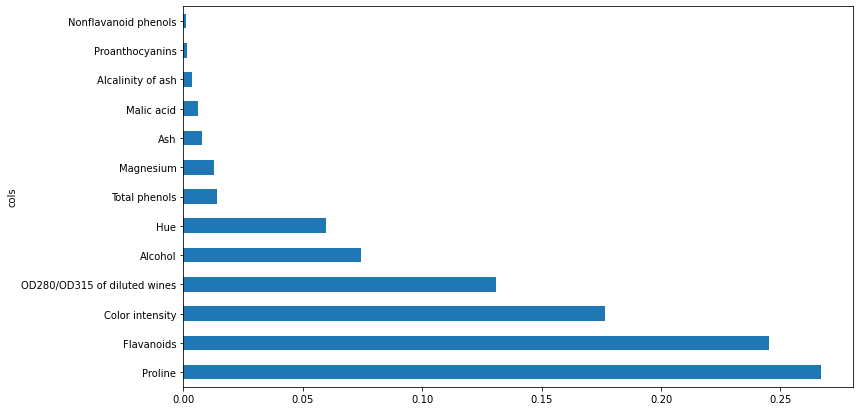

In [259]:
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi);

In [260]:
to3_keep = fi[fi.imp>0.005].cols
len(to3_keep)

10

In [261]:
xs3_imp = xs3[to3_keep]
valid_xs3_imp = valid_xs3[to3_keep]

In [262]:
m3 = rf(xs3_imp, y3)

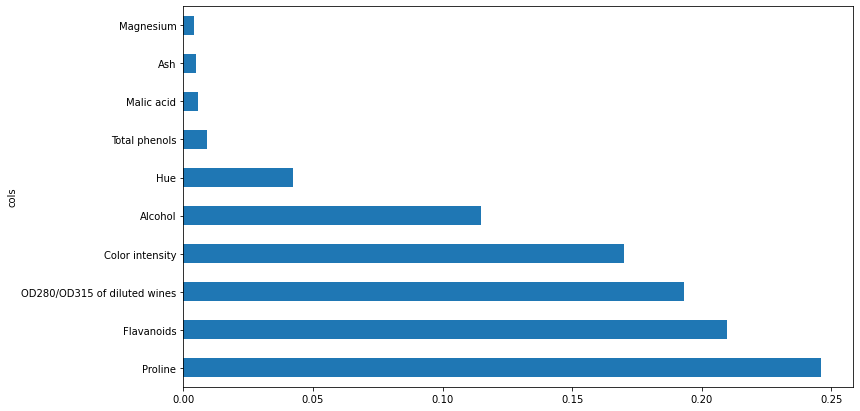

In [263]:
plot_fi(rf_feat_importance(m3, xs3_imp));

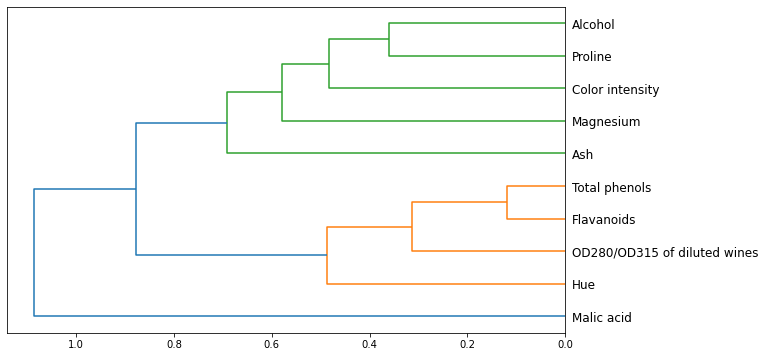

In [264]:
cluster_columns(xs3_imp)

In [265]:
m_accuracy(m3, xs3_imp, y3)

0.34265734265734266